In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

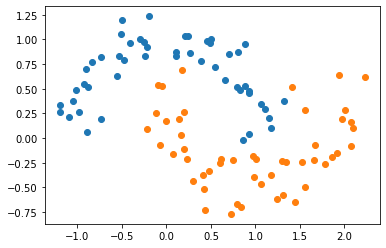

In [2]:
X, y = datasets.make_moons(noise=0.15, random_state=666)  # 半环形图数据集
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [3]:
def RBFKernelSVC(gamma):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma, C=2.0))  # 默认C=1.0
    ])

In [4]:
svc0_01 = RBFKernelSVC(gamma=0.01)
svc0_01.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svc', SVC(C=2.0, gamma=0.01))])

In [5]:
def plot_decision_boundary(model, axis):
    """绘制决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)

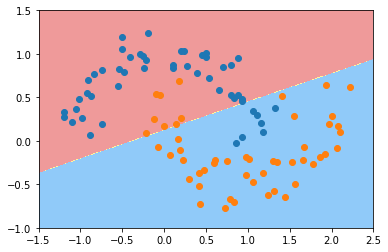

In [6]:
plot_decision_boundary(svc0_01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])  # \gamma过小,欠拟合
plt.show()

In [7]:
svc_gamma0_5 = RBFKernelSVC(gamma=0.5)  # 设置gamma = 0.5(即减少高斯函数带宽,图形变得高瘦)
svc_gamma0_5.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svc', SVC(C=2.0, gamma=0.5))])

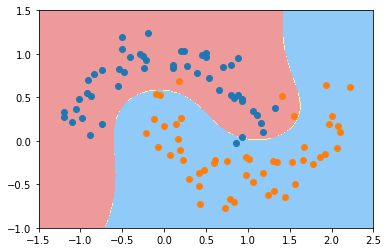

In [8]:
plot_decision_boundary(svc_gamma0_5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [9]:
svc_gamma1 = RBFKernelSVC(gamma=1)
svc_gamma1.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(C=2.0, gamma=1))])

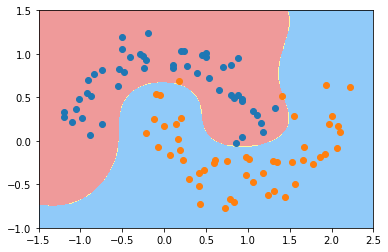

In [10]:
plot_decision_boundary(svc_gamma1, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [11]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svc', SVC(C=2.0, gamma=10))])

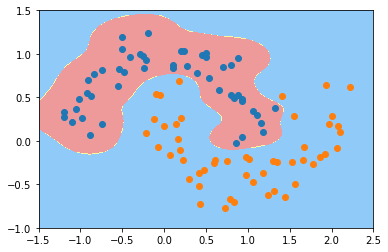

In [12]:
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [13]:
svc_gamma100 = RBFKernelSVC(gamma=100)  # \gamma过大,此时发生过拟合
svc_gamma100.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svc', SVC(C=2.0, gamma=100))])

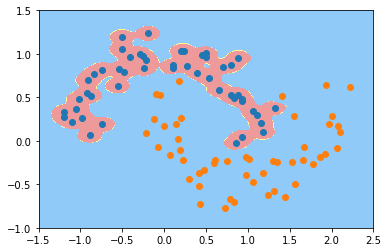

In [14]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()